# Bryce Hill | ECEN 5002

## Lab 02 - Fourier Transform Approximation, More General PAM


### 2/3/16

In [1]:
from pylab import *         # Imports numpy (as np) and matplotlib (as mpl)
import numpy as np
%matplotlib inline 
                            # Adds interactive matplotlib backend
plt.rc('text', usetex=True) # Enable the use of LaTeX for plot titles/labels

In [2]:
# Preamble ---------------------------------------------------------------------------------------------------------------
# Import all custom functions
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_2/My_Functions

/home/bryce/Documents/Class/Signal_Processing/Lab_2/My_Functions


In [3]:
import Macros            # Run setup stuff
import showfun           # Import all functions for 1.(a)
import ecen4652 as ecen  # Import sigWave class
import pamfun            # Import function for 2.(a)

In [4]:
%cd ~/Documents/Class/Signal_Processing/Lab_1/My_Functions

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions


In [5]:
# Import lab 1 functions for use here
import ascfun
import ftpam01
import sinc_ipol

In [6]:
# Cd back out to main directory
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_2

/home/bryce/Documents/Class/Signal_Processing/Lab_2


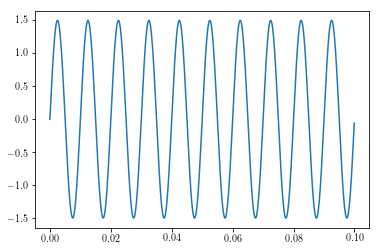

In [7]:
# Try out the sigWave class
Fs = 16000
f0 = 100
tlen = .1
tt = arange(round(tlen*Fs))/float(Fs)
# Instantiate waveform sig0 with sampling rate Fs and t0 = -.05
sig0 = ecen.sigWave(1.5*sin(2*pi*f0*tt), Fs, -.05)
plot(tt, sig0.signal())

It works. 

## Experiment 1: Show FT Function

### -------------------------------------------------------------------------------------------------------------------------------------

### 1. (a) 
 - ** Flip and scale displays **

### -------------------------------------------------------------------------------------------------------------------------------------

In [8]:
# run Macros

f1:  -200.0 | f2:  200.0  | llim:  0.001


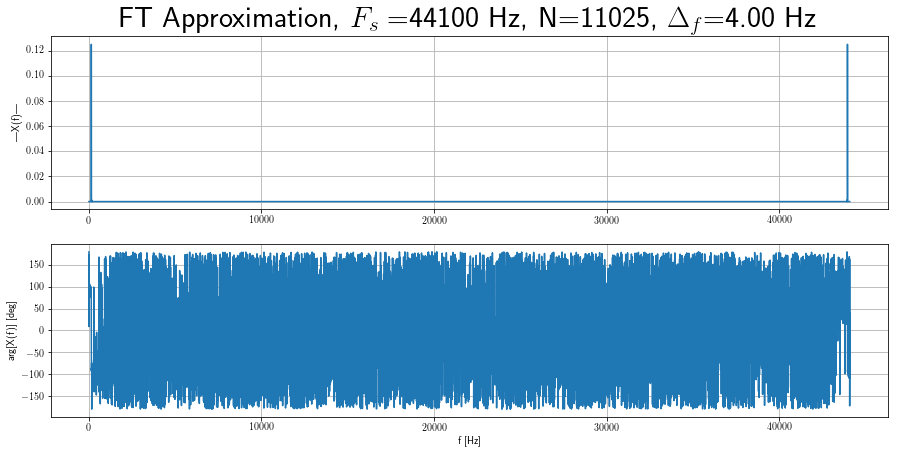

In [9]:
Fs = 44100          # Sampling rate
fa, fb = 140, 164   # Frequencies fa, fb
tlen = 0.25         # Length of t-axis in sec
tt = arange(0,round(Fs*tlen))/float(Fs)    # Time axis
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)  # Linear combination of sinusoids
sig_xt = ecen.sigWave(xt, Fs, 0)           # Waveform from class sigWave
showfun.showft(sig_xt,[-200, 200, 1e-3], 0)# Display X(f), using ff_lim

f1:  -200.0 | f2:  200.0  | llim:  0.001


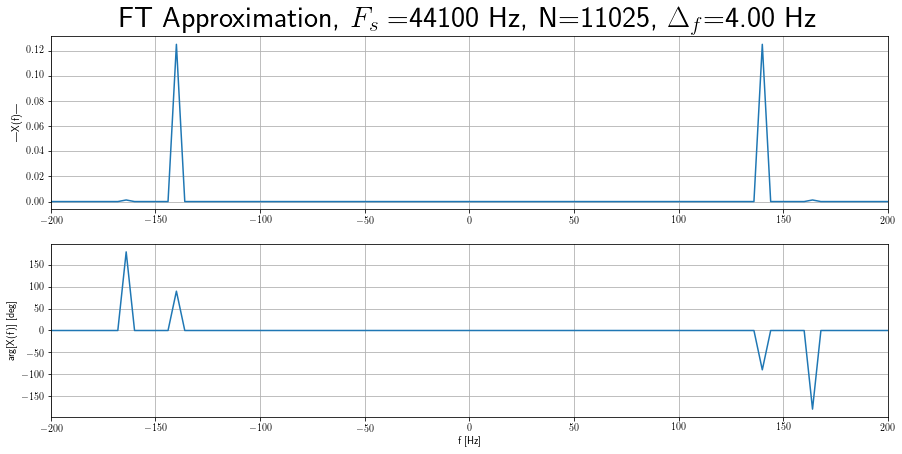

In [10]:
Fs = 44100          # Sampling rate
fa, fb = 140, 164   # Frequencies fa, fb
tlen = 0.25         # Length of t-axis in sec
tt = arange(0,round(Fs*tlen))/float(Fs)    # Time axis
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)  # Linear combination of sinusoids
sig_xt = ecen.sigWave(xt, Fs, 0)           # Waveform from class sigWave
showfun.showft(sig_xt,[-200, 200, 1e-3], 1)# Display X(f), using ff_lim

In [11]:
b = arange(0,10)
print("b: ", b)
b = np.concatenate((b[::-1], b[1:]))
print("bnew: ", b)

b:  [0 1 2 3 4 5 6 7 8 9]
bnew:  [9 8 7 6 5 4 3 2 1 0 1 2 3 4 5 6 7 8 9]


### -------------------------------------------------------------------------------------------------------------------------------------

### 1. (b) 

 - ** Set magnitude to units of [dB] **

### -------------------------------------------------------------------------------------------------------------------------------------

f1:  -200.0 | f2:  200.0  | llim:  0.001


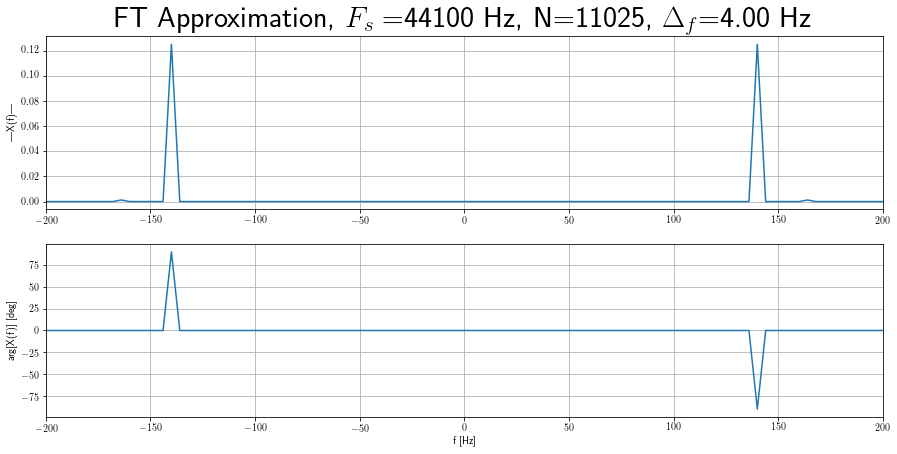

In [12]:
xt2 = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)
sig_xt2 = ecen.sigWave(xt2, Fs, 0)
showfun.showft(sig_xt2,[-200, 200, 1e-3], 1) # Display X(f), using ff_lim

f1:  -200.0 | f2:  200.0  | llim:  -60.0


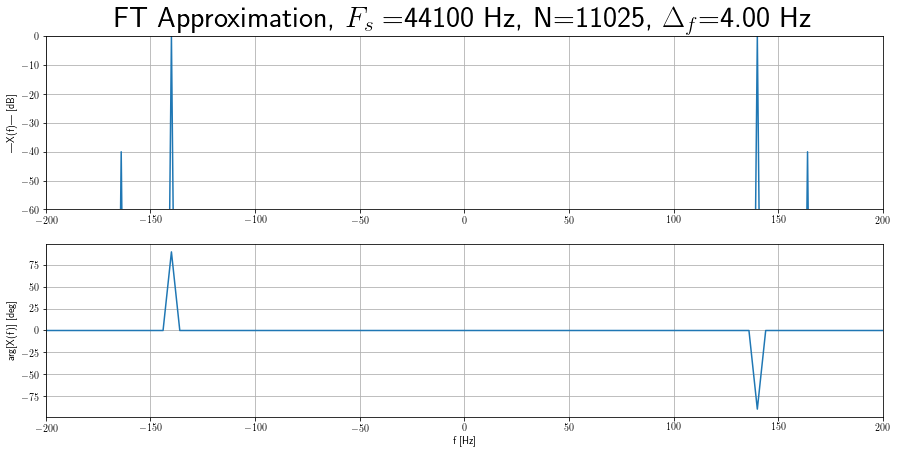

In [13]:
xt2 = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)
sig_xt2 = ecen.sigWave(xt2, Fs, 0)
showfun.showft(sig_xt2,[-200, 200, -60], 2) # Display X(f), using ff_lim

### -------------------------------------------------------------------------------------------------------------------------------------

### 1. (c) 

 - ** Test showft Fcn **

### -------------------------------------------------------------------------------------------------------------------------------------

f1:  -2000.0 | f2:  2000.0  | llim:  -40.0


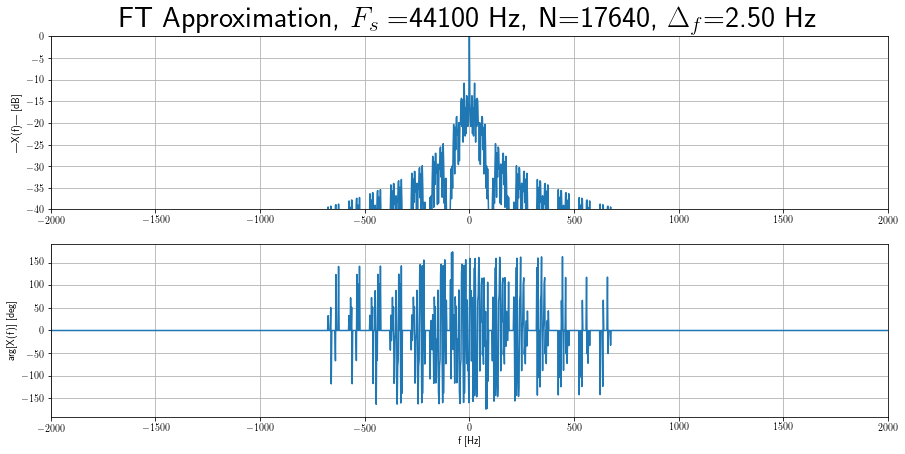

In [14]:
tt, st = ftpam01.ftpam(44100, 100, 'Bryce')
# plot(tt, st)
sig_xt3 = ecen.sigWave(st, 44100, 0)
showfun.showft(sig_xt3,[-2000, 2000, -40], 2) # Display X(f), using ff_lim

## Experiment 2: General PAM Transmitter

### -------------------------------------------------------------------------------------------------------------------------------------

### 2. (a) 

 - ** Verify rectangular function **
 - ** Add triangle and sinc function to Pam10 **

### -------------------------------------------------------------------------------------------------------------------------------------

In [15]:
# Generate a binary sequence representing the ascii message 'Test'
st = ascfun.asc2bin('Test')
st = [int(x) for x in st]
sig_pt1 = ecen.sigSequ(st, 100, 0)
print(st)

[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]


Samples/Bit:  441


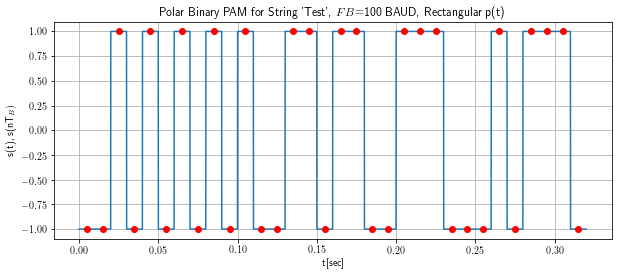

In [16]:
sig_2a = pamfun.pam10(sig_pt1, 44100, 'rect', 'polar')

Samples/Bit:  441


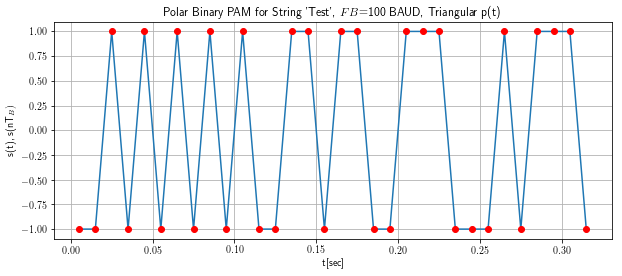

In [17]:
sig_2a = pamfun.pam10(sig_pt1, 44100, 'tri', 'polar')

Samples/Bit:  441


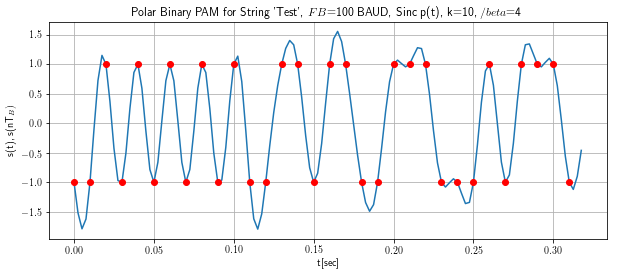

In [18]:
sig_2a = pamfun.pam10(sig_pt1, 44100, 'sinc', 'polar', [10, 4])
show()

### Conclusion: 2. (a)

yes

### -------------------------------------------------------------------------------------------------------------------------------------

### 2. (b) 

 - ** Generate random polar binary sequence **
 - ** Use pam10() to display the signal **

### -------------------------------------------------------------------------------------------------------------------------------------

In [19]:
# Generate random polar binary message
FB = 100                     # Baud rate
dn = random(int(FB/2))       # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)  # Random unipolar binary sequence in {0,1}
an = 2*dn-1                  # Random polar binary sequence in {-1,+1}
sig_pt2_b = ecen.sigSequ(dn, 100, 0) # Put the sequenc into the sigSequ class

** Display the random sequence using the rectangular method **

Samples/Bit:  441


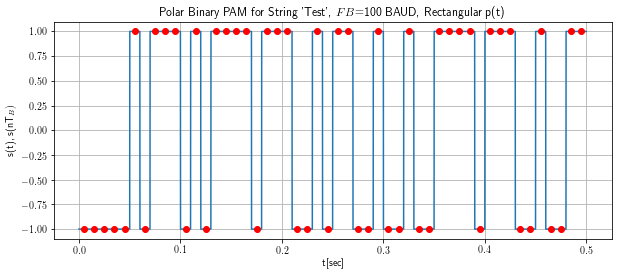

f1:  -1000.0 | f2:  1000.0  | llim:  -60.0


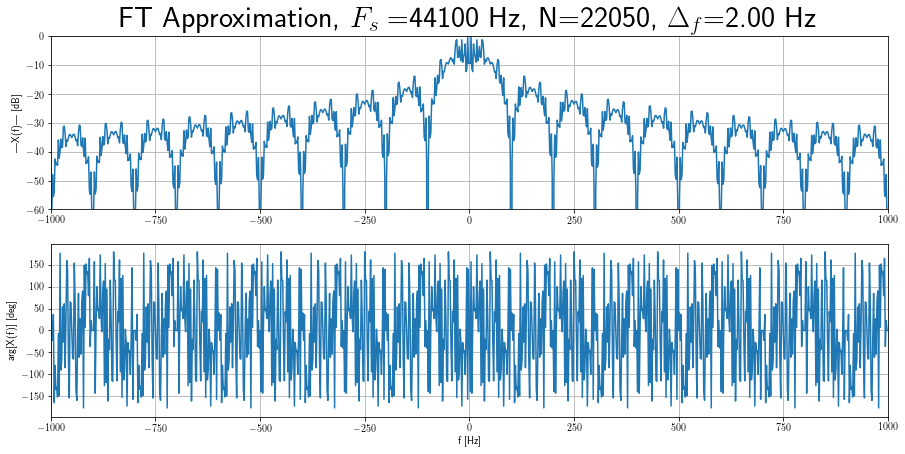

In [20]:
sig_2b_r = pamfun.pam10(sig_pt2_b, 44100, 'rect', 'polar')
showfun.showft(sig_2b_r,[-1000, 1000, -60], 2) 

** Display the random sequence using the triangular method **

Samples/Bit:  441


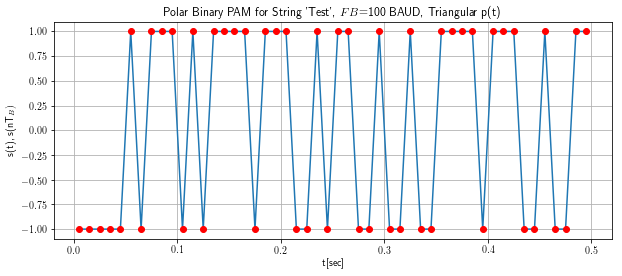

f1:  -1000.0 | f2:  1000.0  | llim:  -60.0


/home/bryce/Documents/Class/Signal_Processing/Lab_2/My_Functions/showfun.py:70: RuntimeWarning: divide by zero encountered in log10
  absXf = 20*log10(abs(Xf)/max(abs(Xf)))	# Magnitude |X(f)|


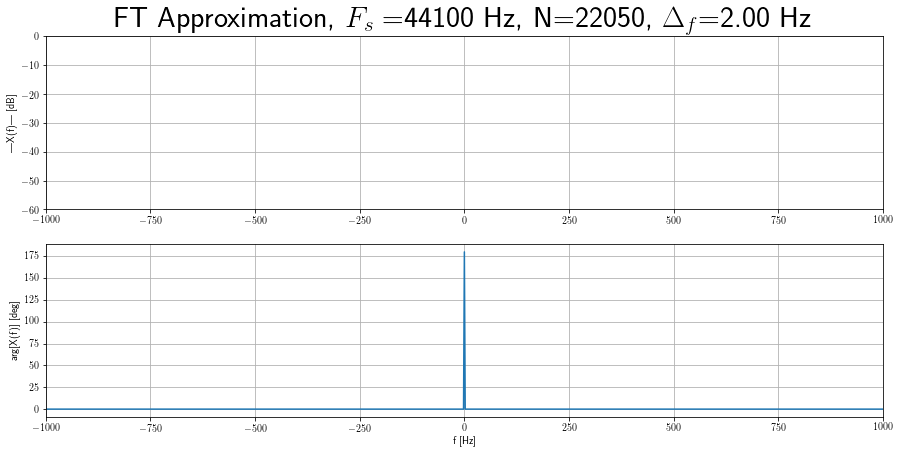

In [21]:
sig_2b_t = pamfun.pam10(sig_pt2_b, 44100, 'tri', 'polar')
showfun.showft(sig_2b_t,[-1000, 1000, -60], 2) 

** Display the random sequence using the sinc method **

Samples/Bit:  441


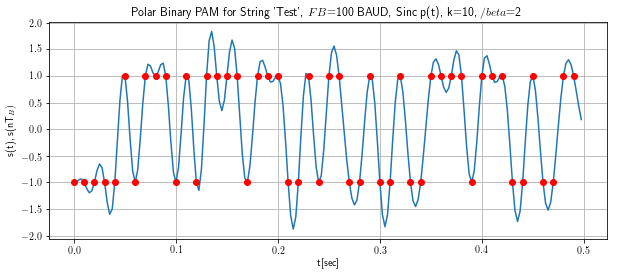

f1:  -200.0 | f2:  200.0  | llim:  -60.0


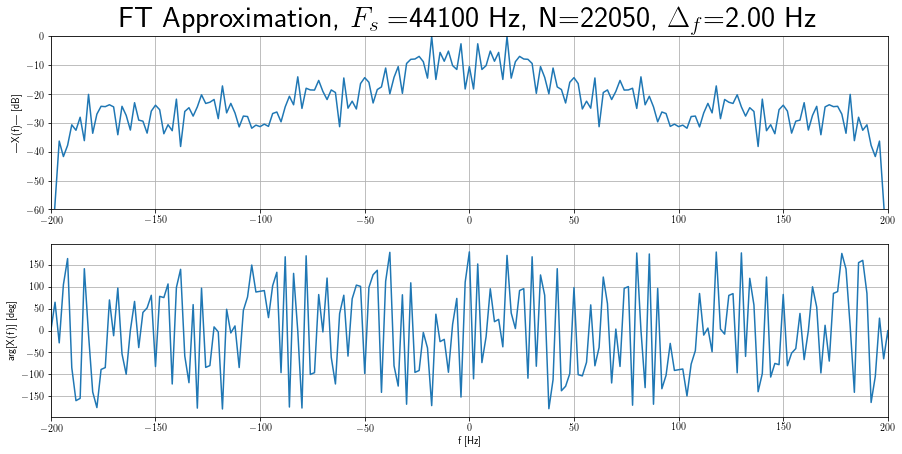

In [22]:
sig_2b_s = pamfun.pam10(sig_pt2_b, 44100, 'sinc', 'polar', [10, 2])
showfun.showft(sig_2b_s,[-200, 200, -60], 2) 

### Conclusion: 2.(b)
I believe the results here make sense, except for the triangle wave. Since we are dealing with a random signal the phase information shouldn't tell us much. Additionally, the amount of frequency information found my the fourier transform should be significant as many different sines would be needed to represent the random signal. I'm not sure if the divide by zero warning is affectng the output of the triangle wave (or for that matter the rectangle wave). However, I am out of time to investigate further. 